# Libraries

In [1]:
import numpy as np
import random
import heapq
import math
import matplotlib.pyplot as plt
from collections import defaultdict

# Ship Design

## 1. Setting up the Grid Size and Sensitivity Parameter [Alpha]

In [2]:
GRID_SIZE = 30
alpha = 0.1  # Sensitivity parameter for the rat detector
random.seed(42)

## 2. Intializing the Ship with an Open and Blocked Cells

In [3]:
def initialize_ship():
    grid = np.ones((GRID_SIZE, GRID_SIZE), dtype=int)
    for i in range(1, GRID_SIZE - 1):
        for j in range(1, GRID_SIZE - 1):
            grid[i, j] = 0 if random.random() < 0.7 else 1  # 70% chance of being open cells in the layout
    return grid

# Initializing the ship layout
ship_grid = initialize_ship()

In [4]:
ship_grid

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

## 3. Ship Layout

In [5]:
def plot_grid(grid, title="Ship Layout"):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='binary', origin='upper')
    plt.title(title)
    plt.show()

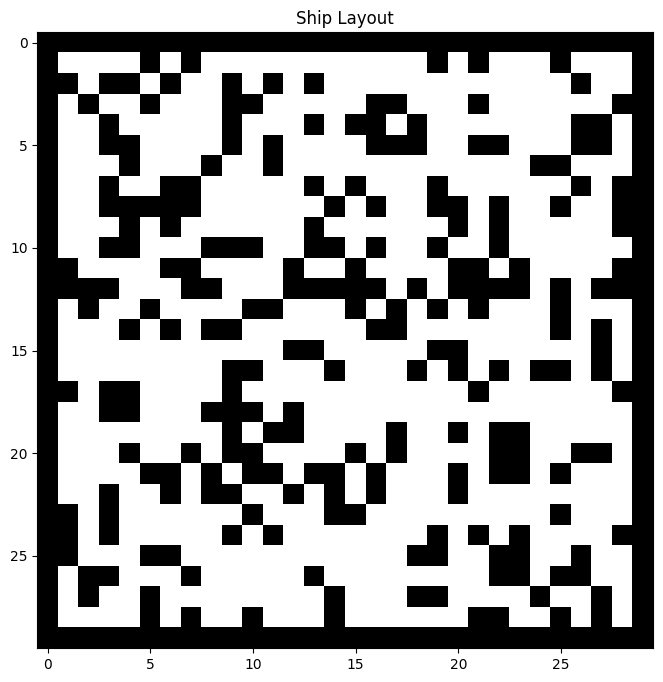

In [6]:
plot_grid(ship_grid)

# Phase 1: Localisation

## 1. 'sense_distances' Function:
  *   This Function will sense distanes to blocked neighbors in all the four directions [up,down,left,right]
  * This Function will return distances in form of Tuple




In [7]:
def sense_distances(grid, pos):
    x, y = pos
    directions = {
        "up": (-1, 0),
        "down": (1, 0),
        "left": (0, -1),
        "right": (0, 1)
    }

    distances = []
    for dx, dy in directions.values():
        distance = 0
        nx, ny = x + dx, y + dy
        while 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx, ny] == 0:
            distance += 1
            nx += dx
            ny += dy
        distances.append(distance)
    return tuple(distances)

## 2. 'generate_distance_signatures' Function:
* This function will genarate a distance signatures for each open cells in the map
* This will create knowledge base for the bot to localised its position in the ship

In [8]:
def generate_distance_signatures(grid):
    distance_signatures = {}
    for x in range(1, GRID_SIZE - 1):
        for y in range(1, GRID_SIZE - 1):
            if grid[x, y] == 0:
                signature = sense_distances(grid, (x, y))
                if signature not in distance_signatures:
                    distance_signatures[signature] = []
                distance_signatures[signature].append((x, y))
    return distance_signatures

distance_signatures = generate_distance_signatures(ship_grid)

In [9]:
print(distance_signatures)

{(0, 0, 0, 3): [(1, 1), (11, 8), (11, 16), (20, 11)], (0, 1, 1, 2): [(1, 2), (5, 13), (20, 12), (24, 25)], (0, 0, 2, 1): [(1, 3), (13, 8), (20, 20), (27, 22)], (0, 0, 3, 0): [(1, 4)], (0, 0, 0, 0): [(1, 6), (2, 5), (4, 17), (11, 22), (13, 16), (19, 10), (21, 9)], (0, 4, 0, 10): [(1, 8)], (0, 0, 1, 9): [(1, 9)], (0, 1, 2, 8): [(1, 10)], (0, 0, 3, 7): [(1, 11)], (0, 9, 4, 6): [(1, 12)], (0, 0, 5, 5): [(1, 13)], (0, 6, 6, 4): [(1, 14)], (0, 2, 7, 3): [(1, 15), (15, 8)], (0, 1, 8, 2): [(1, 16)], (0, 1, 9, 1): [(1, 17)], (0, 2, 10, 0): [(1, 18)], (0, 6, 0, 0): [(1, 20), (14, 5)], (0, 3, 0, 2): [(1, 22), (3, 6), (21, 26)], (0, 9, 1, 1): [(1, 23)], (0, 4, 2, 0): [(1, 24), (16, 13)], (0, 0, 0, 2): [(1, 26), (6, 26)], (0, 2, 1, 1): [(1, 27)], (0, 1, 2, 0): [(1, 28), (12, 6)], (1, 0, 0, 0): [(2, 2), (2, 10), (12, 19), (20, 8), (21, 12), (22, 15), (28, 26)], (0, 4, 0, 1): [(2, 7), (18, 1)], (1, 3, 1, 0): [(2, 8)], (1, 8, 0, 0): [(2, 12)], (1, 5, 0, 11): [(2, 14)], (1, 1, 1, 10): [(2, 15)], (1, 0,

## 3. 'attempt_random_move' Funtion:
* This function is basically used for the bot movement as it will attempt to move and update its position.

In [10]:
def attempt_random_move(grid, position):
    x, y = position
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
    random.shuffle(directions)
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx, ny] == 0:
            return (nx, ny)
    return position

## 4. Localisation Function:

* This function will tried to help the bot to find its intial position on the ship.

In [11]:
def localize_bot_with_random_movement(grid, distance_signatures):
    current_position = random.choice([loc for sig in distance_signatures.values() for loc in sig])
    steps = 0
    while True:
        sensed_signature = sense_distances(grid, current_position)
        if sensed_signature in distance_signatures:
            possible_positions = distance_signatures[sensed_signature]
            print(f"Step {steps + 1}: Sensed Signature: {sensed_signature}, Possible Locations: {len(possible_positions)}")
            if len(possible_positions) == 1:
                print("Bot's position has been identified:", possible_positions[0])
                return possible_positions[0]
            current_position = attempt_random_move(grid, current_position)
        steps += 1

bot_position = localize_bot_with_random_movement(ship_grid, distance_signatures)

Step 1: Sensed Signature: (0, 0, 1, 2), Possible Locations: 2
Step 2: Sensed Signature: (1, 0, 2, 1), Possible Locations: 1
Bot's position has been identified: (28, 3)


# Phase 2 : Catching Rat

## 1. Intializing Rat's Position:
* While initializing the rat's positon we are also ensuring that every time the rat is place in the open cells of the grid

In [12]:
#rat_position = (random.randint(1, GRID_SIZE - 2), random.randint(1, GRID_SIZE - 2))

# Ensure the rat is only placed in open cells
while True:
    rat_position = (random.randint(1, GRID_SIZE - 2), random.randint(1, GRID_SIZE - 2))
    if ship_grid[rat_position] == 0:  # Check if the cell is open
        break

prob_grid = np.full((GRID_SIZE, GRID_SIZE), 1 / (GRID_SIZE * GRID_SIZE))

## 2. Ship Updated Design with Bot and Rat:

In [13]:
def plot_grid_with_positions(grid, bot_position, rat_position, title="Ship Layout with Bot and Rat Positions"):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='binary', origin='upper')
    plt.scatter(bot_position[1], bot_position[0], color='blue', label='Bot', s=100, edgecolors='black')  # Bot in blue
    plt.scatter(rat_position[1], rat_position[0], color='red', label='Rat', s=100, marker='x')  # Rat in red
    plt.legend(loc="upper right")
    plt.title(title)
    plt.show()

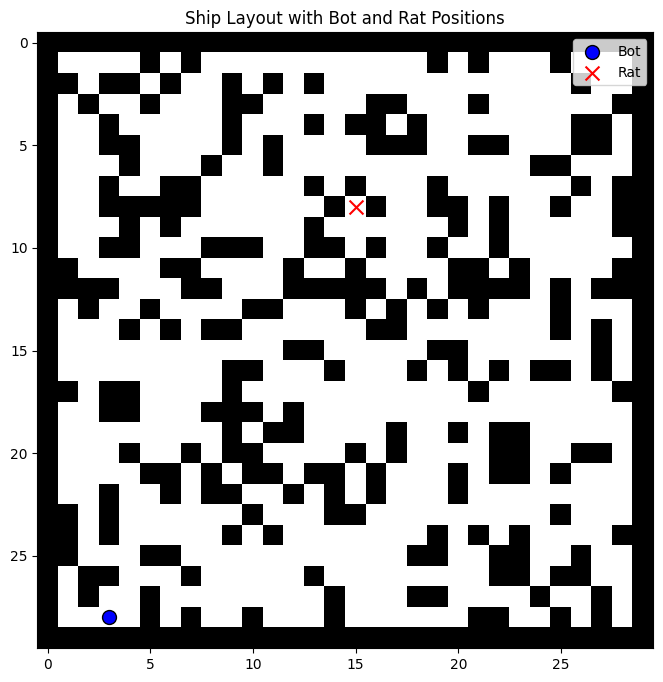

In [14]:
plot_grid_with_positions(ship_grid, bot_position, rat_position)

## 3. Manhattan Distance

In [15]:
def manhattan_distance(cell1, cell2):
    return abs(cell1[0] - cell2[0]) + abs(cell1[1] - cell2[1])

## 4. Ping Probability Function:
* This Function will calculate probability of hearing a ping based on the distance

In [16]:
def ping_probability(distance, alpha):
    return math.exp(-alpha * (distance - 1))

In [17]:
# Update probability grid based on ping result

def update_probabilities(prob_grid, bot_pos, heard_ping, alpha, grid):
    new_prob_grid = np.zeros_like(prob_grid)
    total_prob = 0
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x, y] == 0:  # Only open cells
                dist = manhattan_distance(bot_pos, (x, y))
                prob_ping = ping_probability(dist, alpha)
                if heard_ping:
                    new_prob_grid[x, y] = prob_grid[x, y] * prob_ping
                else:
                    new_prob_grid[x, y] = prob_grid[x, y] * (1 - prob_ping)
                total_prob += new_prob_grid[x, y]
    new_prob_grid /= total_prob  # Normalize probabilities
    return new_prob_grid

## 5. Determining Rat's most likely position in the Grid:

In [18]:
def most_likely_rat_location(prob_grid):
    return np.unravel_index(np.argmax(prob_grid, axis=None), prob_grid.shape)

## 6. Simulate Rat with the Detector:

In [19]:
def space_rat_detector(bot_pos, rat_pos, alpha):
    distance = manhattan_distance(bot_pos, rat_pos)
    prob = ping_probability(distance, alpha)
    return random.random() < prob

## Case 1: Non-Moving Space Rat Situation:

### Baseline Bot:

Actions performed by the baseline bot are as below:

Step 1: Listen for a Ping using 'heard_ping'

Step 2: Update the probability grid based on the ping using 'prob_grid'

Step 3: Identify and Commit to the most likely cell using 'target_pos'

Step 4: Performs movemen to the target cell and returned the position at which the Rat was caught

In [20]:
def baselinebot(grid, bot_pos, rat_pos, prob_grid, alpha):
    actions_taken = 0
    while True:
        # Step 1: Listen for a ping
        heard_ping = space_rat_detector(bot_pos, rat_pos, alpha)
        # Step 2: Update probability grid based on ping
        prob_grid = update_probabilities(prob_grid, bot_pos, heard_ping, alpha, grid)
        # Step 3: Identify and commit to the most likely cell
        target_pos = most_likely_rat_location(prob_grid)
        # Step 4: Move all the way to the target cell
        while bot_pos != target_pos:
            # Determine the direction to move toward the target cell
            bot_x, bot_y = bot_pos
            target_x, target_y = target_pos
            if target_x > bot_x:
                bot_pos = (bot_x + 1, bot_y)
            elif target_x < bot_x:
                bot_pos = (bot_x - 1, bot_y)
            elif target_y > bot_y:
                bot_pos = (bot_x, bot_y + 1)
            else:
                bot_pos = (bot_x, bot_y - 1)
            actions_taken += 1
            # Check if bot has reached the rat's position
            if bot_pos == rat_pos:
                print(f"Rat caught at position {bot_pos} after {actions_taken} actions!")
                return actions_taken

In [21]:
actions_taken = baselinebot(ship_grid, bot_position, rat_position, prob_grid, alpha)
print("Total actions taken to catch the rat:", actions_taken)

Rat caught at position (8, 15) after 164 actions!
Total actions taken to catch the rat: 164


### Our Bot:

In [22]:
def a_star(grid, start, goal):
    # Use defaultdict to avoid key checks
    g_score = defaultdict(lambda: float('inf'))
    g_score[start] = 0
    f_score = defaultdict(lambda: float('inf'))
    f_score[start] = manhattan_distance(start, goal)
    # Pre-compute grid dimensions
    rows, cols = len(grid), len(grid[0])
    # Pre-compute valid moves
    MOVES = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    open_set = [(f_score[start], start)]
    came_from = {}
    while open_set:
        current = heapq.heappop(open_set)[1]
        if current == goal:
            # Reconstruct path more efficiently
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]  # Reverse path more efficiently
        current_g = g_score[current]
        # Optimize neighbor checking
        x, y = current
        for dx, dy in MOVES:
            nx, ny = x + dx, y + dy
            if (0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 0):
                neighbor = (nx, ny)
                tentative_g = current_g + 1
                if tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + manhattan_distance(neighbor, goal)
                    f_score[neighbor] = f
                    heapq.heappush(open_set, (f, neighbor))
    return None

In [23]:
def ourbot(grid, bot_pos, rat_pos, prob_grid, alpha, threshold_factor=0.8):
    actions_taken = 0
    rows, cols = len(grid), len(grid[0])
    # Pre-compute grid properties
    mean_prob = np.mean(prob_grid)
    last_target = None
    consecutive_failed_attempts = 0
    MAX_FAILED_ATTEMPTS = 3
    # Create a memory of visited high-probability locations
    visited_targets = set()
    while actions_taken < rows * cols * 2:  # Add reasonable maximum steps
        heard_ping = space_rat_detector(bot_pos, rat_pos, alpha)
        prob_grid = update_probabilities(prob_grid, bot_pos, heard_ping, alpha, grid)
        # Get top N most likely positions
        flat_indices = np.argsort(prob_grid.ravel())[-5:]  # Consider top 5 positions
        potential_targets = [(idx // cols, idx % cols) for idx in flat_indices]
        # Filter out previously visited targets and blocked cells
        valid_targets = [pos for pos in potential_targets
                        if pos not in visited_targets
                        and grid[pos[0]][pos[1]] == 0
                        and prob_grid[pos] >= threshold_factor * mean_prob]
        if valid_targets:
            target_pos = valid_targets[-1]  # Most likely unvisited position
            path = a_star(grid, bot_pos, target_pos)
            if path:
                # Move along path efficiently
                next_pos = path[0]
                bot_pos = next_pos
                actions_taken += 1
                if bot_pos == rat_pos:
                    return actions_taken
                if bot_pos == target_pos:
                    visited_targets.add(target_pos)
                    consecutive_failed_attempts = 0
            else:
                consecutive_failed_attempts += 1
                if consecutive_failed_attempts >= MAX_FAILED_ATTEMPTS:
                    # Reset strategy if stuck
                    visited_targets.clear()
                    consecutive_failed_attempts = 0
                # Smart random move based on probability gradient
                possible_moves = [(bot_pos[0] + dx, bot_pos[1] + dy) for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]]
                valid_moves = [(x, y) for x, y in possible_moves
                              if 0 <= x < rows and 0 <= y < cols and grid[x][y] == 0]
                if valid_moves:
                    bot_pos = max(valid_moves, key=lambda pos: prob_grid[pos])
                    actions_taken += 1
        else:
            # Reset visited targets if all high-probability locations have been checked
            visited_targets.clear()
        if actions_taken % (rows * cols // 4) == 0:
            # Periodically reset probability grid to avoid getting stuck in local maxima
            prob_grid = np.ones_like(prob_grid) / (rows * cols)
    return actions_taken

In [24]:
actions_taken_by_ourbot = ourbot(ship_grid, bot_position, rat_position, prob_grid, alpha)
print("Total actions taken to catch the rat:", actions_taken_by_ourbot)

Total actions taken to catch the rat: 62


## Case 2: Moving Space Rat Situation:

### 1. Rat Movement Function:

In [25]:
def move_rat(grid, rat_pos):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
    random.shuffle(directions)  # Shuffle to pick a random valid move
    for dx, dy in directions:
        nx, ny = rat_pos[0] + dx, rat_pos[1] + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx, ny] == 0:
            return (nx, ny)  # Return new position if open
    return rat_pos  # Stay in the same position if no open cells

### 2. Baseline Bot:

In [26]:
def baselinebot_rat_movement(grid, bot_pos, rat_pos, prob_grid, alpha):
    actions_taken = 0
    while True:
        # Step 1: Move the rat
        rat_pos = move_rat(grid, rat_pos)
        # Step 2: Listen for a ping
        heard_ping = space_rat_detector(bot_pos, rat_pos, alpha)
        # Step 3: Update probability grid based on ping
        prob_grid = update_probabilities(prob_grid, bot_pos, heard_ping, alpha, grid)
        # Step 4: Find the most likely position of the rat
        target_pos = most_likely_rat_location(prob_grid)
        print(f"Bot Position: {bot_pos}, Rat Position: {rat_pos}")
        # Move the bot step by step to the target position
        while bot_pos != target_pos:
            bot_x, bot_y = bot_pos
            target_x, target_y = target_pos
            # Determine the direction to move
            if target_x > bot_x:
                bot_pos = (bot_x + 1, bot_y)
            elif target_x < bot_x:
                bot_pos = (bot_x - 1, bot_y)
            elif target_y > bot_y:
                bot_pos = (bot_x, bot_y + 1)
            elif target_y < bot_y:
                bot_pos = (bot_x, bot_y - 1)
            actions_taken += 1
            print(f"Moving Bot to {bot_pos}, Rat Position: {rat_pos}, Actions Taken: {actions_taken}")
            # Check if bot has caught the rat
            if bot_pos == rat_pos:
                print(f"Rat caught at position {bot_pos} after {actions_taken} actions!")
                return actions_taken
            # Update rat position dynamically
            rat_pos = move_rat(grid, rat_pos)
            # Recalculate target position if the rat moves
            prob_grid = update_probabilities(prob_grid, bot_pos, heard_ping, alpha, grid)
            target_pos = most_likely_rat_location(prob_grid)

In [27]:
actions_taken_by_baselinebot_with_rat_movement = baselinebot_rat_movement(ship_grid, bot_position, rat_position, prob_grid, alpha)
actions_taken_by_baselinebot_with_rat_movement

Bot Position: (28, 3), Rat Position: (9, 15)
Rat caught at position (21, 4) after 3626 actions!


3626

### 3. Our Bot:

In [28]:
def ourbot_rat_movement(grid, bot_pos, rat_pos, prob_grid, alpha, threshold_factor=0.8):
    actions_taken = 0
    rows, cols = len(grid), len(grid[0])
    # Pre-compute grid properties
    mean_prob = np.mean(prob_grid)
    last_target = None
    consecutive_failed_attempts = 0
    MAX_FAILED_ATTEMPTS = 3
    # Create a memory of visited high-probability locations
    visited_targets = set()
    while actions_taken < rows * cols * 2:  # Add reasonable maximum steps
        rat_pos = move_rat(grid, rat_pos)
        heard_ping = space_rat_detector(bot_pos, rat_pos, alpha)
        prob_grid = update_probabilities(prob_grid, bot_pos, heard_ping, alpha, grid)
        print(f"Bot Position: {bot_pos}, Rat Position: {rat_pos}, Actions Taken: {actions_taken}")
        # Get top N most likely positions
        flat_indices = np.argsort(prob_grid.ravel())[-5:]  # Consider top 5 positions
        potential_targets = [(idx // cols, idx % cols) for idx in flat_indices]
        # Filter out previously visited targets and blocked cells
        valid_targets = [pos for pos in potential_targets
                        if pos not in visited_targets
                        and grid[pos[0]][pos[1]] == 0
                        and prob_grid[pos] >= threshold_factor * mean_prob]
        if valid_targets:
            target_pos = valid_targets[-1]  # Most likely unvisited position
            path = a_star(grid, bot_pos, target_pos)
            if path:
                # Move along path efficiently
                next_pos = path[0]
                bot_pos = next_pos
                actions_taken += 1
                rat_pos = move_rat(grid, rat_pos)  # Move the rat at each bot step
                print(f"Bot Position: {bot_pos}, Rat Position: {rat_pos}, Actions Taken: {actions_taken}")
                if bot_pos == rat_pos:
                    print(f"Rat caught at position {bot_pos} after {actions_taken} actions!")
                    return actions_taken
                if bot_pos == target_pos:
                    visited_targets.add(target_pos)
                    consecutive_failed_attempts = 0
            else:
                consecutive_failed_attempts += 1
                if consecutive_failed_attempts >= MAX_FAILED_ATTEMPTS:
                    # Reset strategy if stuck
                    visited_targets.clear()
                    consecutive_failed_attempts = 0
                # Smart random move based on probability gradient
                possible_moves = [(bot_pos[0] + dx, bot_pos[1] + dy) for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]]
                valid_moves = [(x, y) for x, y in possible_moves
                              if 0 <= x < rows and 0 <= y < cols and grid[x][y] == 0]
                if valid_moves:
                    bot_pos = max(valid_moves, key=lambda pos: prob_grid[pos])
                    actions_taken += 1
        else:
            # Reset visited targets if all high-probability locations have been checked
            visited_targets.clear()
        if actions_taken % (rows * cols // 4) == 0:
            # Periodically reset probability grid to avoid getting stuck in local maxima
            prob_grid = np.ones_like(prob_grid) / (rows * cols)
    return actions_taken

In [29]:
actions_taken_by_ourbot_with_rat_movement = ourbot_rat_movement(ship_grid, bot_position, rat_position, prob_grid, alpha)
actions_taken_by_ourbot_with_rat_movement

Bot Position: (28, 3), Rat Position: (9, 15), Actions Taken: 0
Bot Position: (27, 3), Rat Position: (9, 14), Actions Taken: 1
Bot Position: (27, 3), Rat Position: (9, 15), Actions Taken: 1
Bot Position: (27, 4), Rat Position: (8, 15), Actions Taken: 2
Bot Position: (27, 4), Rat Position: (9, 15), Actions Taken: 2
Bot Position: (26, 4), Rat Position: (9, 14), Actions Taken: 3
Bot Position: (26, 4), Rat Position: (9, 15), Actions Taken: 3
Bot Position: (25, 4), Rat Position: (9, 14), Actions Taken: 4
Bot Position: (25, 4), Rat Position: (9, 15), Actions Taken: 4
Bot Position: (24, 4), Rat Position: (9, 14), Actions Taken: 5
Bot Position: (24, 4), Rat Position: (9, 15), Actions Taken: 5
Bot Position: (23, 4), Rat Position: (8, 15), Actions Taken: 6
Bot Position: (23, 4), Rat Position: (9, 15), Actions Taken: 6
Bot Position: (22, 4), Rat Position: (8, 15), Actions Taken: 7
Bot Position: (22, 4), Rat Position: (9, 15), Actions Taken: 7
Bot Position: (21, 4), Rat Position: (9, 14), Actions T

119